<a href="https://colab.research.google.com/github/GabrielVillagran/clasification-algorithms/blob/main/DecisionTree_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos: Árboles de Decisión y Naive Bayes
Villagran Sacuedo Gabriel Aldair \\
Code developed by Dr. Juan Carlos Cuevas Tello \\
Gen 2017 \\
267572 \\
201702370947

##Introduction
In this homework we are going to develop the decistion tree and the naive bayes algorithm for the wine and iris dataset of the UCI ML repository. \\
The file is divided in 4 sections:
- 1 Iris dataset for 20% and 80%
- 2 Iris dataset for 50% and 50%
- 3 Wine dataset for 20% and 80%
- 4 Wine dataset for 50% and 50%

On each section is explained how the data is divided and how the algorithms were calculated.\\
**NOTE: for each dataset was neccesary to modify adding the attributes indicated on the page, for instance:
- on iris section the atributes were:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica **

##Get access to Google Drive
in this section I'm giving access to colab to my google drive content

In [77]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##iris dataset
Reading the dataset and splitting the data into x and y axis, I'm also printing tha data just to see the content of the dataset

In [78]:
import pandas as pd
df_data_1 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/MachineLearning/datasetClassification/iris.data")
df_data_1.head()

print(df_data_1)
X = df_data_1[["sepal length","sepal width","petal length","petal width"]].to_numpy()
Y = df_data_1["class"].to_numpy()

     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


## Printing the data for verification
Here we are printing the values for x and y just to be sure that everything is working fine

In [79]:
#X

In [80]:
#Y

Convert category data that was previosly divided to numbers



In [81]:
from sklearn.preprocessing import OrdinalEncoder

#Convertir the classes: sepal length, sepal width, petal length and petal width into numbers
enc = OrdinalEncoder()
enc.fit(X)
x_train_enc = enc.transform(X)


In [82]:
#x_train_enc

In [83]:
from sklearn import preprocessing

#Convert the class called class= {Iris-setosa, Iris-versicolor, Iris-virginica} into numbers
le = preprocessing.LabelEncoder()
le.fit(Y)
y_train_enc = le.transform(Y)


In [84]:
#y_train_enc

## 1-. Decision tree 20% for test and 80%
using functios of scikitlearn we are developing the decision tree based on the iris dataset. \\
Compare the performance (confusion matrix and classification error/accuracy) of different methods for the classification task

[[41  0  0]
 [ 0 45  0]
 [ 0  0 34]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        41
Iris-versicolor       1.00      1.00      1.00        45
 Iris-virginica       1.00      1.00      1.00        34

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120



[Text(0.4, 0.9, 'X[3] <= 0.8\ngini = 0.662\nsamples = 120\nvalue = [41, 45, 34]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5, 0.7, 'X[3] <= 1.75\ngini = 0.49\nsamples = 79\nvalue = [0, 45, 34]'),
 Text(0.2, 0.5, 'X[2] <= 4.95\ngini = 0.12\nsamples = 47\nvalue = [0, 44, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(0.3, 0.3, 'X[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8, 0.5, 'X[2] <= 4.85\ngini = 0.061\nsamples = 32\nvalue = [0, 1, 31]'),
 Text(0.7, 0.3, 'X[1] <= 3.0\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

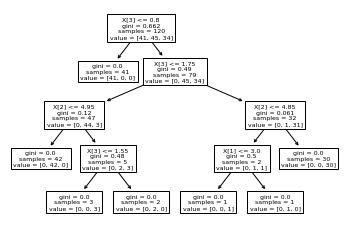

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree

X_train = x_train_enc
Y_train = y_train_enc
#divided the data into 20% for test and 80% for train
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2)

#Crear modelo basado en árbol de decisión
clf = tree.DecisionTreeClassifier()

#Entrenamiento
clf = clf.fit(X_train, Y_train)

#Prueba
y_train_pred = clf.predict(X_train)

#Resultados
print(confusion_matrix(Y_train, y_train_pred))
print(classification_report(Y_train, y_train_pred))

tree.plot_tree(clf)

## 1.1-. Naive Bayes 20% for test and 80%


In [86]:
from sklearn.naive_bayes import GaussianNB

# Crear modelo basado en un clasificador naive Bayes (Gaussiano)
clf = GaussianNB()

# Entrenamiento
clf = clf.fit(X_train, Y_train)

# Prueba
y_train_pred = clf.predict(X_train)

# Resultados
print("===== TRAINING DATA ======")
print(confusion_matrix(Y_train, y_train_pred))
print(classification_report(Y_train, y_train_pred))
  

===== TRAINING DATA ======
[[41  0  0]
 [ 0 42  3]
 [ 0  2 32]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        41
Iris-versicolor       0.95      0.93      0.94        45
 Iris-virginica       0.91      0.94      0.93        34

       accuracy                           0.96       120
      macro avg       0.96      0.96      0.96       120
   weighted avg       0.96      0.96      0.96       120



## 2-. Decision tree 50% for test and 50%

[[25  0  0]
 [ 0 24  0]
 [ 0  0 26]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        25
Iris-versicolor       1.00      1.00      1.00        24
 Iris-virginica       1.00      1.00      1.00        26

       accuracy                           1.00        75
      macro avg       1.00      1.00      1.00        75
   weighted avg       1.00      1.00      1.00        75



[Text(0.4, 0.9, 'X[2] <= 2.45\ngini = 0.666\nsamples = 75\nvalue = [25, 24, 26]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 25\nvalue = [25, 0, 0]'),
 Text(0.5, 0.7, 'X[2] <= 4.95\ngini = 0.499\nsamples = 50\nvalue = [0, 24, 26]'),
 Text(0.2, 0.5, 'X[3] <= 1.65\ngini = 0.204\nsamples = 26\nvalue = [0, 23, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 22\nvalue = [0, 22, 0]'),
 Text(0.3, 0.3, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'X[3] <= 1.75\ngini = 0.08\nsamples = 24\nvalue = [0, 1, 23]'),
 Text(0.7, 0.3, 'X[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 20\nvalue = [0, 0, 20]')]

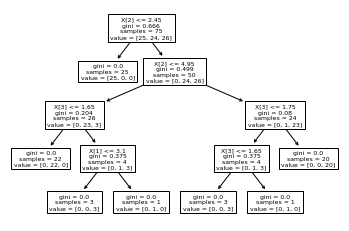

In [87]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree

X_train2 = x_train_enc
Y_train2 = y_train_enc
#divided the data into 50% for test and 50% for train
X_train2, X_test, Y_train2, y_test = train_test_split(X, Y, test_size=0.5)

#Crear modelo basado en árbol de decisión
clf = tree.DecisionTreeClassifier()

#Entrenamiento
clf = clf.fit(X_train2, Y_train2)

#Prueba
y_train_pred = clf.predict(X_train2)

#Resultados
print(confusion_matrix(Y_train2, y_train_pred))
print(classification_report(Y_train2, y_train_pred))

tree.plot_tree(clf)

## 2.1-. Naive Bayes 50% for test and 50%


In [88]:
from sklearn.naive_bayes import GaussianNB

# Crear modelo basado en un clasificador naive Bayes (Gaussiano)
clf = GaussianNB()

# Entrenamiento
clf = clf.fit(X_train2, Y_train2)

# Prueba
y_train_pred = clf.predict(X_train2)

# Resultados
print("===== TRAINING DATA ======")
print(confusion_matrix(Y_train2, y_train_pred))
print(classification_report(Y_train2, y_train_pred))

===== TRAINING DATA ======
[[25  0  0]
 [ 0 21  3]
 [ 0  3 23]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        25
Iris-versicolor       0.88      0.88      0.88        24
 Iris-virginica       0.88      0.88      0.88        26

       accuracy                           0.92        75
      macro avg       0.92      0.92      0.92        75
   weighted avg       0.92      0.92      0.92        75



##Wine dataset
Reading the dataset and splitting the data into x and y axis, I'm also printing tha data just to see the content of the dataset

In [91]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
df_data_2 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/MachineLearning/datasetClassification/wine.data")
df_data_2.head()

print(df_data_2)
X_wine = df_data_2[["alcohol","malic acid","ash","alcalinity","magnesium","phenols","flavanoids","nonflavanoid","proanthocyanins","color intensity","hue","diluted wines"]].to_numpy()
Y_wine = df_data_2["proline"].to_numpy()

#Convert the x class into numbers
enc = OrdinalEncoder()
enc.fit(X_wine)
x_train_enc = enc.transform(X_wine)
from sklearn import preprocessing

#Convert the y class into numbers
le = preprocessing.LabelEncoder()
le.fit(Y_wine)
y_train_enc = le.transform(Y_wine)


    alcohol  malic acid   ash  alcalinity  magnesium  phenols  flavanoids  \
1     14.23        1.71  2.43        15.6        127     2.80        3.06   
1     13.20        1.78  2.14        11.2        100     2.65        2.76   
1     13.16        2.36  2.67        18.6        101     2.80        3.24   
1     14.37        1.95  2.50        16.8        113     3.85        3.49   
1     13.24        2.59  2.87        21.0        118     2.80        2.69   
..      ...         ...   ...         ...        ...      ...         ...   
3     13.71        5.65  2.45        20.5         95     1.68        0.61   
3     13.40        3.91  2.48        23.0        102     1.80        0.75   
3     13.27        4.28  2.26        20.0        120     1.59        0.69   
3     13.17        2.59  2.37        20.0        120     1.65        0.68   
3     14.13        4.10  2.74        24.5         96     2.05        0.76   

    nonflavanoid  proanthocyanins  color intensity   hue  diluted wines  \


## 3-. Decision tree 20% for test and 80%
using functios of scikitlearn we are developing the decision tree based on the iris dataset. \\
Compare the performance (confusion matrix and classification error/accuracy) of different methods for the classification task

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
              precision    recall  f1-score   support

         278       1.00      1.00      1.00         1
         290       1.00      1.00      1.00         1
         312       1.00      1.00      1.00         1
         315       1.00      1.00      1.00         1
         325       1.00      1.00      1.00         1
         342       1.00      1.00      1.00         1
         345       1.00      1.00      1.00         1
         352       1.00      1.00      1.00         1
         355       1.00      1.00      1.00         1
         365       1.00      1.00      1.00         1
         372       1.00      1.00      1.00         1
         378       1.00      1.00      1.00         1
         380       1.00      1.00      1.00         1
         385       1.00      1.00      1.00         1
         392       1.00      1.00      1.00         1
         406   

[Text(0.4634850543478261, 0.9833333333333333, 'X[6] <= 1.97\ngini = 0.988\nsamples = 142\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 3\n1, 1, 1, 2, 2, 1, 1, 2, 1, 3, 1, 2, 1, 2\n1, 1, 1, 4, 4, 1, 2, 2, 1, 2, 1, 4, 1, 1\n1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 2\n1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1\n1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1\n2, 3, 1, 1, 1, 1, 1, 1]'),
 Text(0.2061820652173913, 0.95, 'X[1] <= 1.56\ngini = 0.97\nsamples = 65\nvalue = [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0\n0, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 1, 1, 3\n1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2\n0, 1, 1, 3, 4, 1, 2, 1, 1, 2, 0, 2, 1, 1\n0, 0, 1, 1, 0, 1, 4, 0, 1, 0, 1, 1, 1, 0\n1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.08695652173913043, 0.9166666666666666, 'X[4] <= 107.0\ngini = 0.871\nsamples = 15\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0

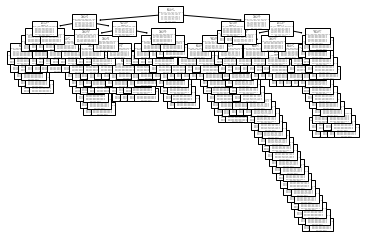

In [92]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree

X_train_wine = x_train_enc
Y_train_wine = y_train_enc
#divided the data into 20% for test and 80% for train
X_train_wine, X_test, Y_train_wine, y_test = train_test_split(X_wine, Y_wine, test_size=0.2)

#Crear modelo basado en árbol de decisión
clf = tree.DecisionTreeClassifier()

#Entrenamiento
clf = clf.fit(X_train_wine, Y_train_wine)

#Prueba
y_train_pred = clf.predict(X_train_wine)

#Resultados
print(confusion_matrix(Y_train_wine, y_train_pred))
print(classification_report(Y_train_wine, y_train_pred))

tree.plot_tree(clf)

## 3.1-. Naive Bayes 20% for test and 80%


In [93]:
from sklearn.naive_bayes import GaussianNB

# Crear modelo basado en un clasificador naive Bayes (Gaussiano)
clf = GaussianNB()

# Entrenamiento
clf = clf.fit(X_train_wine, Y_train_wine)

# Prueba
y_train_pred = clf.predict(X_train_wine)

# Resultados
print("===== TRAINING DATA ======")
print(confusion_matrix(Y_train_wine, y_train_pred))
print(classification_report(Y_train_wine, y_train_pred))

===== TRAINING DATA ======
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
              precision    recall  f1-score   support

         278       1.00      1.00      1.00         1
         290       1.00      1.00      1.00         1
         312       1.00      1.00      1.00         1
         315       1.00      1.00      1.00         1
         325       1.00      1.00      1.00         1
         342       1.00      1.00      1.00         1
         345       1.00      1.00      1.00         1
         352       1.00      1.00      1.00         1
         355       1.00      1.00      1.00         1
         365       1.00      1.00      1.00         1
         372       1.00      1.00      1.00         1
         378       1.00      1.00      1.00         1
         380       1.00      1.00      1.00         1
         385       1.00      1.00      1.00         1
         392       1.00      1.00      1.0

## 4-. Decision tree 50% for test and 50%

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
              precision    recall  f1-score   support

         315       1.00      1.00      1.00         1
         342       1.00      1.00      1.00         1
         345       1.00      1.00      1.00         1
         372       1.00      1.00      1.00         1
         378       1.00      1.00      1.00         1
         406       1.00      1.00      1.00         1
         415       1.00      1.00      1.00         1
         420       1.00      1.00      1.00         1
         428       1.00      1.00      1.00         1
         438       1.00      1.00      1.00         1
         450       1.00      1.00      1.00         1
         463       1.00      1.00      1.00         1
         465       1.00      1.00      1.00         1
         466       1.00      1.00      1.00         1
         470       1.00      1.00      1.00         1
         480   

[Text(0.3553316885964912, 0.9791666666666666, 'X[1] <= 0.965\ngini = 0.983\nsamples = 89\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 3, 1, 2, 1, 3, 2, 2, 2, 1, 1, 1\n1, 1, 1, 3, 1, 1, 1, 4, 1, 2, 1, 1, 1, 2\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1\n1, 1]'),
 Text(0.3377878289473684, 0.9375, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0]'),
 Text(0.37287554824561403, 0.9375, 'X[9] <= 3.285\ngini = 0.983\nsamples = 87\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 3, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1\n1, 1, 1, 3, 1, 1, 1, 4, 1, 2, 1, 1, 1, 2\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1\n1, 1]'),
 Text(0.09649122807017543, 0.8958333333333334, 'X[5] <= 1.99\ngini = 0.92\nsamples = 20

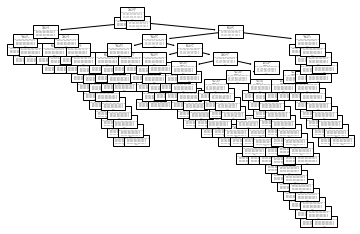

In [97]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree

X_train_wine_2 = x_train_enc
Y_train_wine_2 = y_train_enc
#divided the data into 50% for test and 50% for train
X_train_wine_2, X_test, Y_train_wine_2, y_test = train_test_split(X_wine, Y_wine, test_size=0.5)

#Crear modelo basado en árbol de decisión
clf = tree.DecisionTreeClassifier()

#Entrenamiento
clf = clf.fit(X_train_wine_2, Y_train_wine_2)

#Prueba
y_train_pred = clf.predict(X_train_wine_2)

#Resultados
print(confusion_matrix(Y_train_wine_2, y_train_pred))
print(classification_report(Y_train_wine_2, y_train_pred))

tree.plot_tree(clf)

## 4.1-. Naive Bayes 50% for test and 50%


In [98]:
from sklearn.naive_bayes import GaussianNB

# Crear modelo basado en un clasificador naive Bayes (Gaussiano)
clf = GaussianNB()

# Entrenamiento
clf = clf.fit(X_train_wine_2, Y_train_wine_2)

# Prueba
y_train_pred = clf.predict(X_train_wine_2)

# Resultados
print("===== TRAINING DATA ======")
print(confusion_matrix(Y_train_wine_2, y_train_pred))
print(classification_report(Y_train_wine_2, y_train_pred))

===== TRAINING DATA ======
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
              precision    recall  f1-score   support

         315       1.00      1.00      1.00         1
         342       1.00      1.00      1.00         1
         345       1.00      1.00      1.00         1
         372       1.00      1.00      1.00         1
         378       1.00      1.00      1.00         1
         406       1.00      1.00      1.00         1
         415       1.00      1.00      1.00         1
         420       1.00      1.00      1.00         1
         428       1.00      1.00      1.00         1
         438       1.00      1.00      1.00         1
         450       1.00      1.00      1.00         1
         463       1.00      1.00      1.00         1
         465       1.00      1.00      1.00         1
         466       1.00      1.00      1.00         1
         470       1.00      1.00      1.0

##Conclusions
Results for each dataset:
- Iris 20% 80%

Accuracy: {0.96, 120} \\
Macro avg: {0.96, 0.96, 0.96, 120} \\
Weighted avg: {0.96, 0.96, 0.96, 120}
- iris 50% 50%

Accuracy: {0.92, 75} \\
Macro avg: {0.92, 0.92, 0.92, 75} \\
Weighted avg: {0.92, 0.92, 0.92, 75}
- Wine 20% 80%

Accuracy: {0.97, 89} \\
Macro avg: {0.99, 0.98, 0.98, 89} \\
Weighted avg: {0.97, 0.97, 0.97, 89}
- Wine 50% 50%

Accuracy: {0.93, 142} \\
Macro avg: {0.97, 0.97, 0.97, 142} \\
Weighted avg: {0.93, 0.93, 0.93, 142} \\
**Accuracy is just the percentage of predictions that were made correctly, expressed as a decimal number between 0 (0% of predictions correct) and 1 (100% of predictions correct).**

It was an interesting work to see how to program each algorithms and split the datasets into two different quantities, this homework complement the theory that we saw in class and the topic about Naïve Bayes and Decision trees are more clear. 

##Resources
- https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/
- https://scikit-learn.org/stable/modules/tree.html#classification
-  https://scikit-learn.org/stable/modules/naive_bayes.html# 
- https://towardsdatascience.com/choosing-performance-metrics-61b40819eae1
